In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

In [45]:
data = sns.load_dataset('mpg')

In [46]:
print(data.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [47]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [48]:
data['brand'] = data['name'].apply(lambda x: x.split()[0])
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name      brand  
0          70    usa  chevrolet chevelle malibu  chevrolet  
1          70    usa          buick skylark 320      buick  
2          70    usa         plymouth satellite   plymouth  
3          70    usa              amc rebel sst        amc  
4          70    usa                ford torino       ford  


In [49]:
data = data.drop('name', axis=1)
print(data.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin      brand  
0          70    usa  chevrolet  
1          70    usa      buick  
2          70    usa   plymouth  
3          70    usa        amc  
4          70    usa       ford  


In [50]:
print(data['brand'].unique())


['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


In [51]:
data['brand'] = data['brand'].replace({
    'chevroelt': 'chevrolet',  
    'mercedes-benz': 'mercedes',
    'toyouta': 'toyota',
   
})

In [52]:
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   brand         392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


In [53]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
data_dummies = pd.get_dummies(data[categorical_cols], drop_first=True)


In [54]:
data_numeric = data.drop(columns=categorical_cols)
dataDummies = pd.concat([data_numeric, data_dummies], axis=1)
print(dataDummies.info())


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mpg               392 non-null    float64
 1   cylinders         392 non-null    int64  
 2   displacement      392 non-null    float64
 3   horsepower        392 non-null    float64
 4   weight            392 non-null    int64  
 5   acceleration      392 non-null    float64
 6   model_year        392 non-null    int64  
 7   origin_japan      392 non-null    bool   
 8   origin_usa        392 non-null    bool   
 9   brand_audi        392 non-null    bool   
 10  brand_bmw         392 non-null    bool   
 11  brand_buick       392 non-null    bool   
 12  brand_cadillac    392 non-null    bool   
 13  brand_capri       392 non-null    bool   
 14  brand_chevrolet   392 non-null    bool   
 15  brand_chevy       392 non-null    bool   
 16  brand_chrysler    392 non-null    bool   
 17  br

In [55]:
scaler = StandardScaler()
numeric_cols = data_numeric.columns.tolist()
dataDummies[numeric_cols] = scaler.fit_transform(dataDummies[numeric_cols])
print(dataDummies.head())

        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.698638   1.483947      1.077290    0.664133  0.620540     -1.285258   
1 -1.083498   1.483947      1.488732    1.574594  0.843334     -1.466724   
2 -0.698638   1.483947      1.182542    1.184397  0.540382     -1.648189   
3 -0.955212   1.483947      1.048584    1.184397  0.536845     -1.285258   
4 -0.826925   1.483947      1.029447    0.924265  0.555706     -1.829655   

   model_year  origin_japan  origin_usa  brand_audi  ...  brand_pontiac  \
0   -1.625315         False        True       False  ...          False   
1   -1.625315         False        True       False  ...          False   
2   -1.625315         False        True       False  ...          False   
3   -1.625315         False        True       False  ...          False   
4   -1.625315         False        True       False  ...          False   

   brand_renault  brand_saab  brand_subaru  brand_toyota  brand_triumph  \
0          False 

In [56]:
print(dataDummies.corr()['mpg'])


mpg                 1.000000
cylinders          -0.777618
displacement       -0.805127
horsepower         -0.778427
weight             -0.832244
acceleration        0.423329
model_year          0.580541
origin_japan        0.451454
origin_usa         -0.565161
brand_audi          0.056537
brand_bmw           0.002794
brand_buick        -0.116456
brand_cadillac     -0.033954
brand_capri         0.010082
brand_chevrolet    -0.140291
brand_chevy        -0.061353
brand_chrysler     -0.098832
brand_datsun        0.245564
brand_dodge        -0.049286
brand_fiat          0.101222
brand_ford         -0.190289
brand_hi           -0.093721
brand_honda         0.245092
brand_maxda         0.023923
brand_mazda         0.153889
brand_mercedes      0.005867
brand_mercury      -0.094336
brand_nissan        0.081448
brand_oldsmobile   -0.048693
brand_opel          0.030012
brand_peugeot       0.004473
brand_plymouth     -0.065513
brand_pontiac      -0.090860
brand_renault       0.070083
brand_saab    

In [57]:
X = dataDummies.drop('mpg', axis=1)
y = dataDummies['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize model and score tracking
lr = LinearRegression()
train_scores = []
test_scores = []
# Limit features to avoid long computation time
max_features = min(10, X_train.shape[1])  # Limit to 10 features max
features_range = range(1, max_features + 1)
print(f"Will test {len(features_range)} different feature counts: {list(features_range)}")
print(f"Total available features: {X_train.shape[1]}")

Will test 10 different feature counts: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Total available features: 41


In [59]:
# Sequential Feature Selection with progress tracking
print("Starting Sequential Feature Selection...")

for i, n_features in enumerate(features_range):
    print(f"Testing {n_features} features... ({i+1}/{len(features_range)})")
    
    try:
        # Use forward selection which is typically faster
        sfs = SequentialFeatureSelector(
            lr, 
            n_features_to_select=n_features,
            direction='forward',  # Forward selection is usually faster
            cv=3  # Use 3-fold CV to speed up
        )
        sfs.fit(X_train, y_train)
        selected_features = X_train.columns[sfs.get_support()]
        
        # Fit and score the model
        lr.fit(X_train[selected_features], y_train)
        train_score = lr.score(X_train[selected_features], y_train)
        test_score = lr.score(X_test[selected_features], y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        print(f"  R² - Train: {train_score:.3f}, Test: {test_score:.3f}")
        
    except Exception as e:
        print(f"  Error with {n_features} features: {e}")
        # Add default scores if there's an error
        train_scores.append(0)
        test_scores.append(0)

print("Sequential Feature Selection completed!")

Starting Sequential Feature Selection...
Testing 1 features... (1/10)
  R² - Train: 0.698, Test: 0.653
Testing 2 features... (2/10)
  R² - Train: 0.698, Test: 0.653
Testing 2 features... (2/10)
  R² - Train: 0.810, Test: 0.794
Testing 3 features... (3/10)
  R² - Train: 0.810, Test: 0.794
Testing 3 features... (3/10)
  R² - Train: 0.825, Test: 0.782
Testing 4 features... (4/10)
  R² - Train: 0.825, Test: 0.782
Testing 4 features... (4/10)
  R² - Train: 0.835, Test: 0.790
Testing 5 features... (5/10)
  R² - Train: 0.835, Test: 0.790
Testing 5 features... (5/10)
  R² - Train: 0.838, Test: 0.782
Testing 6 features... (6/10)
  R² - Train: 0.838, Test: 0.782
Testing 6 features... (6/10)
  R² - Train: 0.839, Test: 0.783
Testing 7 features... (7/10)
  R² - Train: 0.839, Test: 0.783
Testing 7 features... (7/10)
  R² - Train: 0.840, Test: 0.775
Testing 8 features... (8/10)
  R² - Train: 0.840, Test: 0.775
Testing 8 features... (8/10)
  R² - Train: 0.841, Test: 0.775
Testing 9 features... (9/10)


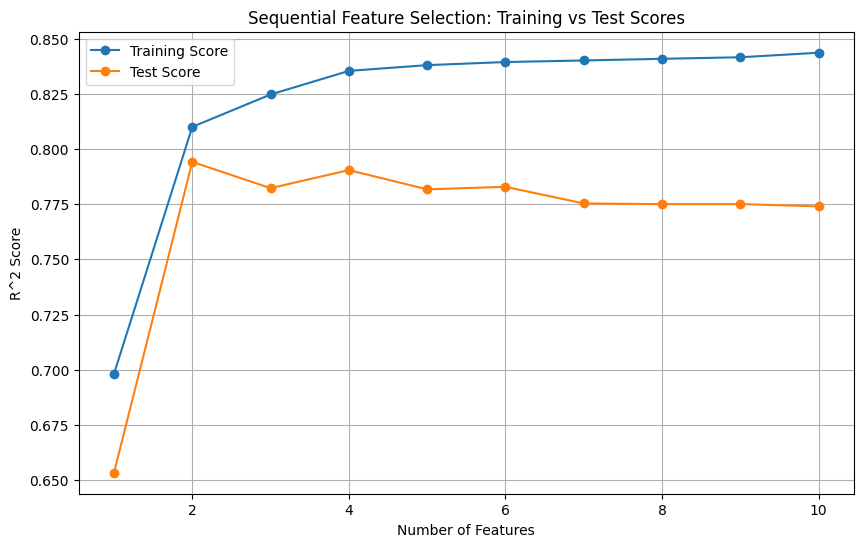

Optimal number of features: 2 (Test R²: 0.794)

MULTIPLE REGRESSION ANALYSIS

Selected Features (2):
 1. weight
 2. model_year

Model Performance:
Training R²: 0.8100
Test R²: 0.7942

Multiple Regression Equation:
MPG = 0.004 -0.740*weight +0.366*model_year

Coefficient Interpretation:
• weight: -0.740 - For each unit increase, MPG decreases by 0.740
• model_year: 0.366 - For each unit increase, MPG increases by 0.366

Feature Importance (by absolute coefficient):
 1. weight               | Coef:   -0.740 | Impact: 0.740
 2. model_year           | Coef:    0.366 | Impact: 0.366

Prediction Analysis:
Mean Squared Error: 0.173
Root Mean Squared Error: 0.416
Mean Absolute Error: 0.320

Selected Features (2):
 1. weight
 2. model_year

Model Performance:
Training R²: 0.8100
Test R²: 0.7942

Multiple Regression Equation:
MPG = 0.004 -0.740*weight +0.366*model_year

Coefficient Interpretation:
• weight: -0.740 - For each unit increase, MPG decreases by 0.740
• model_year: 0.366 - For each un

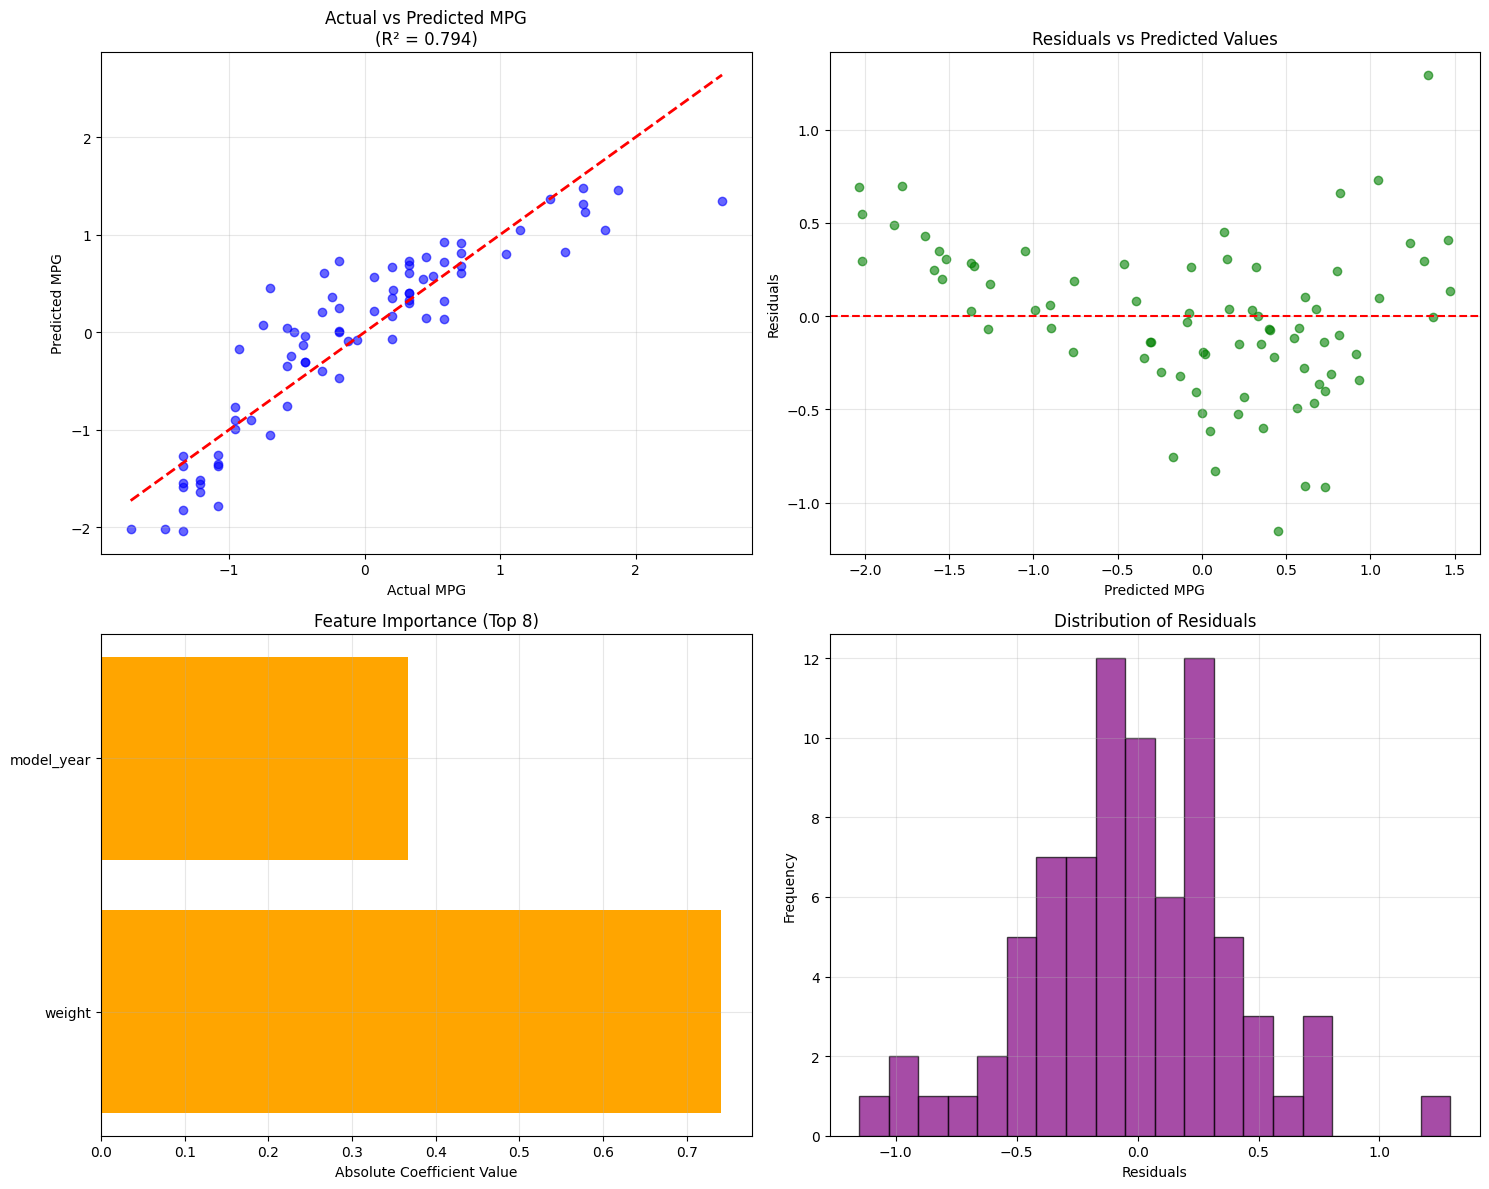


MULTIPLE REGRESSION SUMMARY
✅ Used 2 features for optimal prediction
✅ Achieved 79.4% variance explanation in MPG
✅ Model equation with interpretable coefficients provided
✅ Feature importance analysis completed


In [60]:
plt.figure(figsize=(10,6))
plt.plot(features_range, train_scores, label='Training Score', marker='o')
plt.plot(features_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('Sequential Feature Selection: Training vs Test Scores')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal number of features (best test score)
best_n_features = features_range[test_scores.index(max(test_scores))]
print(f"Optimal number of features: {best_n_features} (Test R²: {max(test_scores):.3f})")

# MULTIPLE REGRESSION ANALYSIS
print("\n" + "="*60)
print("MULTIPLE REGRESSION ANALYSIS")
print("="*60)

# Build final model with optimal features
sfs_final = SequentialFeatureSelector(
    LinearRegression(), 
    n_features_to_select=best_n_features,
    direction='forward',
    cv=3
)
sfs_final.fit(X_train, y_train)
selected_features = X_train.columns[sfs_final.get_support()]

print(f"\nSelected Features ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Train final multiple regression model
final_model = LinearRegression()
final_model.fit(X_train[selected_features], y_train)

# Model Performance
train_r2 = final_model.score(X_train[selected_features], y_train)
test_r2 = final_model.score(X_test[selected_features], y_test)

print(f"\nModel Performance:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Multiple Regression Coefficients
print(f"\nMultiple Regression Equation:")
print(f"MPG = {final_model.intercept_:.3f}", end="")

coefficients = final_model.coef_
for feature, coef in zip(selected_features, coefficients):
    sign = "+" if coef >= 0 else ""
    print(f" {sign}{coef:.3f}*{feature}", end="")
print()

print(f"\nCoefficient Interpretation:")
for feature, coef in zip(selected_features, coefficients):
    direction = "increases" if coef > 0 else "decreases"
    print(f"• {feature}: {coef:.3f} - For each unit increase, MPG {direction} by {abs(coef):.3f}")

# Feature Importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance (by absolute coefficient):")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<20} | Coef: {row['Coefficient']:8.3f} | Impact: {row['Abs_Coefficient']:.3f}")

# Predictions vs Actual
y_pred = final_model.predict(X_test[selected_features])
residuals = y_test - y_pred

print(f"\nPrediction Analysis:")
print(f"Mean Squared Error: {np.mean(residuals**2):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(np.mean(residuals**2)):.3f}")
print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.3f}")

# Multiple Regression Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual MPG')
axes[0, 0].set_ylabel('Predicted MPG')
axes[0, 0].set_title(f'Actual vs Predicted MPG\n(R² = {test_r2:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Predicted
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Predicted MPG')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance
top_features = feature_importance.head(8)  # Show top 8 features
axes[1, 0].barh(top_features['Feature'], top_features['Abs_Coefficient'], color='orange')
axes[1, 0].set_xlabel('Absolute Coefficient Value')
axes[1, 0].set_title('Feature Importance (Top 8)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals Distribution
axes[1, 1].hist(residuals, bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MULTIPLE REGRESSION SUMMARY")
print("="*60)
print(f"✅ Used {len(selected_features)} features for optimal prediction")
print(f"✅ Achieved {test_r2:.1%} variance explanation in MPG")
print(f"✅ Model equation with interpretable coefficients provided")
print(f"✅ Feature importance analysis completed")
print("="*60)
